An Eigenfaces Session with python
==========
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [1]:
# Populating the interactive namespace from numpy and matplotlib

class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind # Contains the 
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender

Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [2]:
class Parlament(object):
    def __init__(self):
        self.elements=[] # Contains diputados
        self.inds=[]
        self.ndips=0
    def add(self, diputado): # Just adding diputado element to the parlament
        self.elements.append(diputado) 
        self.inds.append(diputado.getInd())
        self.ndips += 1
    def getInds(self): 
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()

In [3]:
def rgb2gray(image):
    import numpy as np
    
    gray = np.zeros((len(image),len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
            gray[i,j] = image[i,j,0]*299/1000 + image[i,j,1]*587/1000 + image[i,j,2]*114/1000
            
    return gray
            
            

## 1 - Import the data

We read data from .csv file.

In [4]:
import csv
with open('db/index.csv', 'r',encoding="utf8") as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"db/db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)

## 2 - Mean representative $\mu$

Compute and plot the image of the mean representative $\mu$

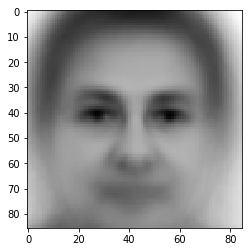

In [9]:
import numpy as np
import matplotlib.pyplot as plt

all_img= np.array([rgb2gray(plt.imread(p[i].getPicfile())) for i in range(0,p.len())]) # Get all images.
shape_img = np.shape(all_img)
avg_image = np.sum(all_img, axis=0)/shape_img[0] # Do the average.
# Show the mean representative.
plt.figure()
plt.imshow(avg_image, cmap=plt.cm.gray)

## 3 - Principal Component Analysis

Build a principal component analysis of the dataset.


### 3.1 - Build dataset

Build the dataset:
- Turn RGB image to Grayscale image.
- A grayscale image is a matrix of pixel intensity values.
- Turn the matrix to a vector of values.

In [8]:
from scipy import ndimage,misc,shape
import numpy as np
import matplotlib.pyplot as plt

# Get the shape of an image, all must be equal 86 rows x 85 columns.
I = plt.imread(p[1].getPicfile())
Is = np.shape(I[:,:,1])
# Create dataset.
X=np.array([np.reshape(rgb2gray(plt.imread(p[i].getPicfile())), np.prod(Is)) for i in range(0,p.len())]) # Turn images from RGB to Gray.
Yg=np.array([ p[i].getGender() for i in range(0,p.len())]) # Array of gender.
Yp=np.array([ p[i].getParty() for i in range(0,p.len())]) # Array of party.

# X has 348 vectors of 7310 values each, which are the pixels values.
np.unique(Yp),np.unique(Yg),shape(X)

(array(['GC-CiU', 'GCC', 'GER-ERC', 'GIV-IU-ICV', 'GMx', 'GP', 'GS', 'GV'],
       dtype='<U10'), array(['H', 'M'], dtype='<U1'), (348, 7310))

### 3.2 - Compute PCA

The first component only explains 21.53 % of the variance. But explains much more than the second which only explans 8.87 % of the variance.

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

sX = preprocessing.scale(X) # Put data on one scale.
ncomp=8
mod=PCA(n_components=ncomp)
mod.fit(sX)
ev = mod.explained_variance_ratio_
print(ev)
Xpca = mod.transform(sX)

[0.21534548 0.08868028 0.07253821 0.05253204 0.04563523 0.03800276
 0.03028296 0.01979431]


### 3.3 - 2D PCA scoreplot showing political affiliation

Text(0, 0.5, '2PC (9.0%)')

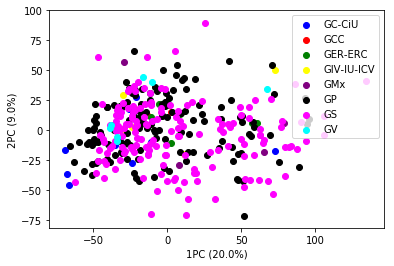

In [11]:
# Affiliation
colors=['blue','red','green','yellow','purple','black','magenta','cyan']
clut = dict(zip(['GC-CiU', 'GCC', 'GER-ERC', 'GIV-IU-ICV', 'GMx', 'GP', 'GS', 'GV'],colors))
plt.scatter(Xpca[np.where(Yp=='GC-CiU'),0],Xpca[np.where(Yp=='GC-CiU'),1],c='blue')
plt.scatter(Xpca[np.where(Yp=='GCC'),0],Xpca[np.where(Yp=='GCC'),1],c='red')
plt.scatter(Xpca[np.where(Yp=='GER-ERC'),0],Xpca[np.where(Yp=='GER-ERC'),1],c='green')
plt.scatter(Xpca[np.where(Yp=='GIV-IU-ICV'),0],Xpca[np.where(Yp=='GIV-IU-ICV'),1],c='yellow')
plt.scatter(Xpca[np.where(Yp=='GMx'),0],Xpca[np.where(Yp=='GMx'),1],c='purple')
plt.scatter(Xpca[np.where(Yp=='GP'),0],Xpca[np.where(Yp=='GP'),1],c='black')
plt.scatter(Xpca[np.where(Yp=='GS'),0],Xpca[np.where(Yp=='GS'),1],c='magenta')
plt.scatter(Xpca[np.where(Yp=='GV'),0],Xpca[np.where(Yp=='GV'),1],c='cyan')
plt.legend(('GC-CiU', 'GCC', 'GER-ERC', 'GIV-IU-ICV', 'GMx', 'GP', 'GS', 'GV'))
plt.xlabel('1PC ('+ "%s" % float( "%2.1g" % (100*ev[0])) +"%)")
plt.ylabel('2PC ('+ "%s" % float( "%2.1g" % (100*ev[1])) +"%)")

### 3.4 - 2D PCA scoreplot showing gender

Text(0, 0.5, '2PC (9.0%)')

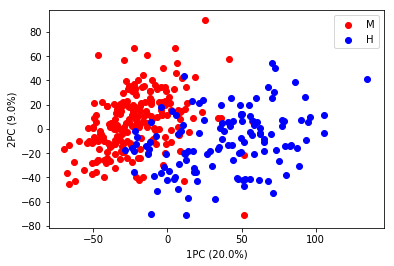

In [12]:
# Gender
colors=['blue','red']
clut = dict(zip(['M','H'],['red','blue']))
plt.scatter(Xpca[np.where(Yg=='H'),0],\
Xpca[np.where(Yg=='H'),1],c='red')
plt.scatter(Xpca[np.where(Yg=='M'),0],\
Xpca[np.where(Yg=='M'),1],c='blue')
plt.legend(('M','H'))
plt.xlabel('1PC ('+ "%s" % float( "%2.1g" % (100*ev[0])) +"%)")
plt.ylabel('2PC ('+ "%s" % float( "%2.1g" % (100*ev[1])) +"%)")

## 4 - First three eigen vectors

Plot the first three eigenvectors as images.

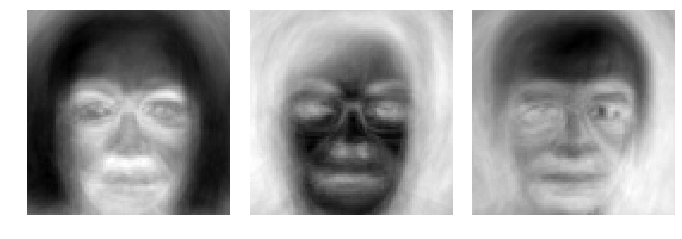

In [13]:
eigendips = mod.components_.reshape((ncomp, Is[0], Is[1])) 
plt.figure(figsize=(9 ,3))
plt.subplot(131)
plt.imshow(eigendips[0], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(eigendips[1], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(eigendips[2], cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1, top=1, bottom=0, left=0, right=1)

In [ ]:
def plot_eigen_scores(s1,s2,t1,t2,mu):
    image = s1*t1 + s2*t2 + mu
    plt.imshow(image, cmap=plt.cm.gray)
    
    
from ipywidgets import widgets, interact
import matplotlib.pyplot as plt

interact(plot_eigen_scores,s1=widgets.IntSlider(value=1,min=0,max=100,step=1,description='s1:',disabled=False), s2=widgets.IntSlider(value=1,min=0,max=100,step=1,description='s2:',disabled=False),t1=eigendips[0],t2=eigendips[1],mu=avg_image)



## 5 - 𝑘-means clustering
(with  𝑘=2  and  𝑘=8 ), plot the images clustered for different groups and the mean image per cluster.

In [40]:
def plotg(g): # Plot all the images with same k-means label.
    indg = np.where(k_means.labels_ == g)
    nx = int(np.sqrt(shape(indg)[1]))+1
    ny = nx+1
    f = plt.figure()
    for e,i in enumerate(indg[0]):
        f.add_subplot(ny,nx,e+1)
        plt.imshow(X[i,:].reshape(Is), cmap=plt.cm.gray)
        plt.axis('off')


### 5.1 - Two clusters (k = 2)

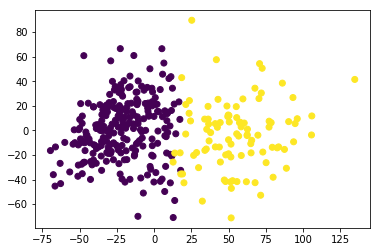

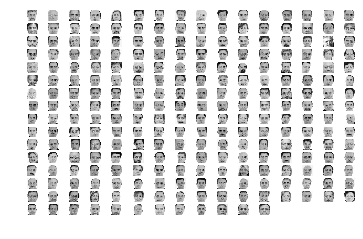

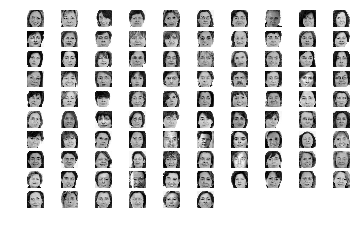

In [41]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2,n_init=10)
k_means.fit(Xpca)
plt.scatter(Xpca[:,0],Xpca[:,1],c=k_means.labels_.astype(np.float))

for i in np.unique(k_means.labels_):
    plotg(i)

### 5.1 - Eight clusters (k = 8)

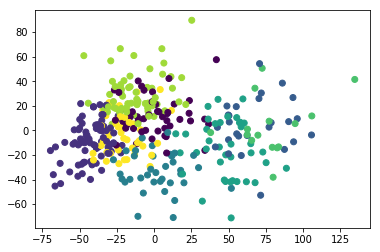

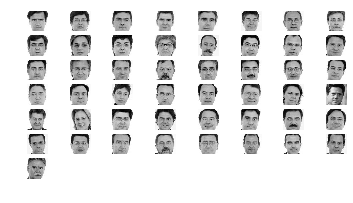

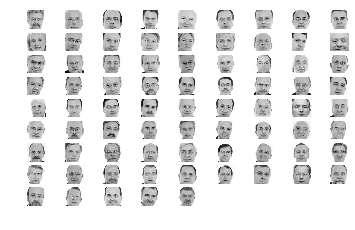

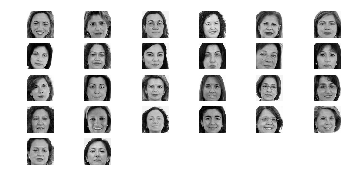

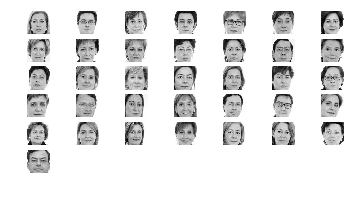

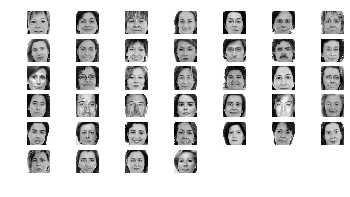

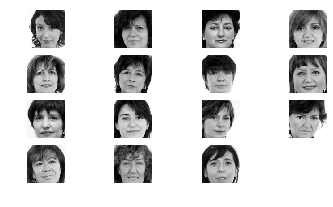

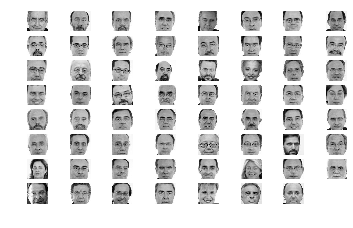

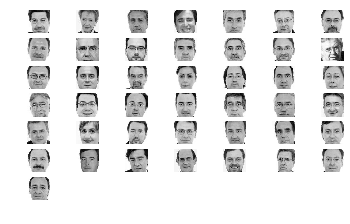

In [42]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=8,n_init=10)
k_means.fit(Xpca)
plt.scatter(Xpca[:,0],Xpca[:,1],c=k_means.labels_.astype(np.float))
        
for i in np.unique(k_means.labels_):
    plotg(i)

## 6 - k-NN classifier

Fit a k-nn classifier on this dataset for both targets (political afiliation and gender).

In [ ]:
#from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  



### 6.1 - Afiliation

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(sX, Yp, test_size=0.20)  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### 6.1.1 - Evaluating the Algorithm

In [51]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[45  1]
 [ 7 17]]
              precision    recall  f1-score   support

           H       0.87      0.98      0.92        46
           M       0.94      0.71      0.81        24

   micro avg       0.89      0.89      0.89        70
   macro avg       0.90      0.84      0.86        70
weighted avg       0.89      0.89      0.88        70



###  6.2 - Gender

In [49]:
from sklearn.neighbors import KNeighborsClassifier  

X_train, X_test, y_train, y_test = train_test_split(sX, Yg, test_size=0.20)  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### 6.2.1 - Evaluating the Algorithm

In [50]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[45  1]
 [ 7 17]]
              precision    recall  f1-score   support

           H       0.87      0.98      0.92        46
           M       0.94      0.71      0.81        24

   micro avg       0.89      0.89      0.89        70
   macro avg       0.90      0.84      0.86        70
weighted avg       0.89      0.89      0.88        70

